## Volcanoes in Japan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported! :)')
import warnings
#%matplotlib notebook
warnings.filterwarnings('ignore')

Libraries imported! :)


In [2]:
data = pd.read_csv("Japan_Volcano.csv")
data.head(5)

,Unnamed: 0,Name,Elevation_meters,Elevation_ft,Coordinates,Last_eruption,Region
0,0,Akaigawa Caldera,725,2379,﻿43.083°N 140.817°E﻿,1.3 Ma BP,Hokkaido
1,1,Mount Atosanupuri,512,1680,﻿43.610°N 144.438°E﻿,1000-200 BP,Hokkaido
2,2,Daisetsuzan Volcanic Group,2290,7513,﻿43.663°N 142.854°E﻿,AD 1739,Hokkaido
3,3,Mount Eniwa,1320,4331,﻿42.793°N 141.285°E﻿,17th century,Hokkaido
4,4,Mount Esan,613,2028,﻿41.804°N 141.166°E﻿,AD 1874,Hokkaido


In [3]:
data.columns

Index(['Unnamed: 0', 'Name', 'Elevation_meters', 'Elevation_ft', 'Coordinates',
       'Last_eruption', 'Region'],
      dtype='object')

Data Checking

In [4]:
print(data.shape)
print(data.isnull().sum())

(184, 7)
Unnamed: 0          0
Name                0
Elevation_meters    0
Elevation_ft        0
Coordinates         0
Last_eruption       2
Region              0
dtype: int64


There're small datas missing in dataset.It seems nearly full.However never trust to this conclusion.It may be not null but It can be filled with another letter like "-","*" etc.

In [5]:
data.head(20)

,Unnamed: 0,Name,Elevation_meters,Elevation_ft,Coordinates,Last_eruption,Region
0,0,Akaigawa Caldera,725,2379,﻿43.083°N 140.817°E﻿,1.3 Ma BP,Hokkaido
1,1,Mount Atosanupuri,512,1680,﻿43.610°N 144.438°E﻿,1000-200 BP,Hokkaido
2,2,Daisetsuzan Volcanic Group,2290,7513,﻿43.663°N 142.854°E﻿,AD 1739,Hokkaido
3,3,Mount Eniwa,1320,4331,﻿42.793°N 141.285°E﻿,17th century,Hokkaido
4,4,Mount Esan,613,2028,﻿41.804°N 141.166°E﻿,AD 1874,Hokkaido
5,5,Akan Caldera [ja],-,-,﻿43.451°N 144.110°E﻿,0.25 Ma BP,Hokkaido
6,6,Mount Meakan,1499,4916,﻿43.386°N 144.008°E﻿,AD 2008,Hokkaido
7,7,Mount Oakan,1370,4495,﻿43.453°N 144.163°E﻿,5-2.5 ka BP,Hokkaido
8,8,Mount Iō,1563,5128,﻿44.131°N 145.165°E﻿,AD 1936,Hokkaido
9,9,Kussharo Caldera,-,-,﻿43.621°N 144.336°E﻿,2.3 ka BP,Hokkaido


Unfortunately There're some hidden "Null" values filled with "-"

In [6]:
data.dtypes.value_counts()

object    6
int64     1
dtype: int64

But some column's data types are not we want for example take a look "Elevation_meters".Int would make our job easier instead of string

In [7]:
df = data.copy() # in case if we want to rollback

In [8]:
for i in data.columns:
    print("type ",type(i))

type  <class 'str'>
type  <class 'str'>
type  <class 'str'>
type  <class 'str'>
type  <class 'str'>
type  <class 'str'>
type  <class 'str'>


In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)# no need for that

In [10]:
df.head(5)

,Name,Elevation_meters,Elevation_ft,Coordinates,Last_eruption,Region
0,Akaigawa Caldera,725,2379,﻿43.083°N 140.817°E﻿,1.3 Ma BP,Hokkaido
1,Mount Atosanupuri,512,1680,﻿43.610°N 144.438°E﻿,1000-200 BP,Hokkaido
2,Daisetsuzan Volcanic Group,2290,7513,﻿43.663°N 142.854°E﻿,AD 1739,Hokkaido
3,Mount Eniwa,1320,4331,﻿42.793°N 141.285°E﻿,17th century,Hokkaido
4,Mount Esan,613,2028,﻿41.804°N 141.166°E﻿,AD 1874,Hokkaido


In [11]:
df["Elevation_ft"]=df["Elevation_ft"].where(df["Elevation_ft"]!="-")

In [12]:
df["Elevation_meters"]=df["Elevation_meters"].where(df["Elevation_meters"]!="-")

In [13]:
df.head(30)

,Name,Elevation_meters,Elevation_ft,Coordinates,Last_eruption,Region
0,Akaigawa Caldera,725,2379,﻿43.083°N 140.817°E﻿,1.3 Ma BP,Hokkaido
1,Mount Atosanupuri,512,1680,﻿43.610°N 144.438°E﻿,1000-200 BP,Hokkaido
2,Daisetsuzan Volcanic Group,2290,7513,﻿43.663°N 142.854°E﻿,AD 1739,Hokkaido
3,Mount Eniwa,1320,4331,﻿42.793°N 141.285°E﻿,17th century,Hokkaido
4,Mount Esan,613,2028,﻿41.804°N 141.166°E﻿,AD 1874,Hokkaido
5,Akan Caldera [ja],NaN,NaN,﻿43.451°N 144.110°E﻿,0.25 Ma BP,Hokkaido
6,Mount Meakan,1499,4916,﻿43.386°N 144.008°E﻿,AD 2008,Hokkaido
7,Mount Oakan,1370,4495,﻿43.453°N 144.163°E﻿,5-2.5 ka BP,Hokkaido
8,Mount Iō,1563,5128,﻿44.131°N 145.165°E﻿,AD 1936,Hokkaido
9,Kussharo Caldera,NaN,NaN,﻿43.621°N 144.336°E﻿,2.3 ka BP,Hokkaido


In [14]:
df['Elevation_meters'].isnull().sum()#You may take a look with  df[df["Elevation_meters"]!=None] or df[df["Elevation_meters"]!=None]["Elevation_meters"]

25

In [15]:
#df['Elevation_meters']= df[df["Elevation_meters"]!=None]["Elevation_meters"].astype(int) #First I wrote this and didn't work :)
df['Elevation_meters']=df['Elevation_meters'].fillna(0).astype(float)

In [16]:
df['Elevation_ft']=df['Elevation_ft'].fillna(0).astype(float)

In [17]:
df.head(30)#Elevation_meters & Elevation_ft are not a string now.They're float

,Name,Elevation_meters,Elevation_ft,Coordinates,Last_eruption,Region
0,Akaigawa Caldera,725.0,2379.0,﻿43.083°N 140.817°E﻿,1.3 Ma BP,Hokkaido
1,Mount Atosanupuri,512.0,1680.0,﻿43.610°N 144.438°E﻿,1000-200 BP,Hokkaido
2,Daisetsuzan Volcanic Group,2290.0,7513.0,﻿43.663°N 142.854°E﻿,AD 1739,Hokkaido
3,Mount Eniwa,1320.0,4331.0,﻿42.793°N 141.285°E﻿,17th century,Hokkaido
4,Mount Esan,613.0,2028.0,﻿41.804°N 141.166°E﻿,AD 1874,Hokkaido
5,Akan Caldera [ja],0.0,0.0,﻿43.451°N 144.110°E﻿,0.25 Ma BP,Hokkaido
6,Mount Meakan,1499.0,4916.0,﻿43.386°N 144.008°E﻿,AD 2008,Hokkaido
7,Mount Oakan,1370.0,4495.0,﻿43.453°N 144.163°E﻿,5-2.5 ka BP,Hokkaido
8,Mount Iō,1563.0,5128.0,﻿44.131°N 145.165°E﻿,AD 1936,Hokkaido
9,Kussharo Caldera,0.0,0.0,﻿43.621°N 144.336°E﻿,2.3 ka BP,Hokkaido


I would like to write as a suggestion:<br> For this kind of project it may not be a problem and can waste of time to turning to them a decimal.<br>Try to use "Decimal" datatype instead of "Float" datatype for Medium&Big projects.<br>
https://beepscore.com/website/2018/10/12/using-pandas-with-python-decimal.html  <br>
because with float <br>
a = 1.1 + 2.2<br>
print(a)<br>
#3.3000000000000003 <br>

And Problems that you can encounter while devoloping project may cost heavier than you think

## Exploratory Data Analysis

We will just do some graphs about this data.As you've noticed it's not a really big dataset therefore  no need to use much time...
We will answer 3 questions about it:<br>
1->Which Region has more volcanos than others?<br>
2->Distribution of Volcanos's height?<br>
**3->Which Letter does their names start mostly?**

* 1->Which Region has more volcanos than others?<br>

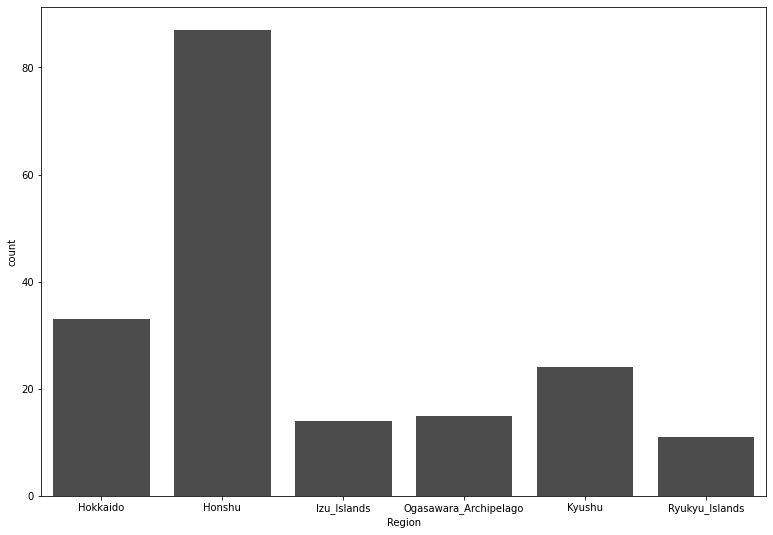

In [18]:
#let's look first for region
plt.figure(figsize = (13,9))
sns.countplot(data = df, x = 'Region', color = 'black', alpha = 0.7)
plt.show()

* 2->Distribution of Volcanos's height?<br>

Text(0, 0.5, 'Height(Meter)')

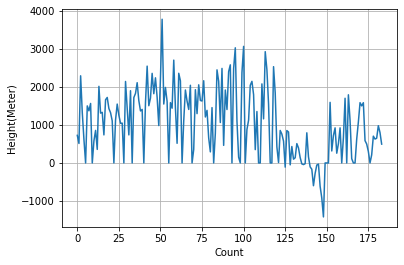

In [19]:
fig, ax = plt.subplots()
ax.plot(df["Elevation_meters"])
ax.grid()

ax.set_xlabel("Count")
ax.set_ylabel("Height(Meter)")



Text(0, 0.5, 'Region')

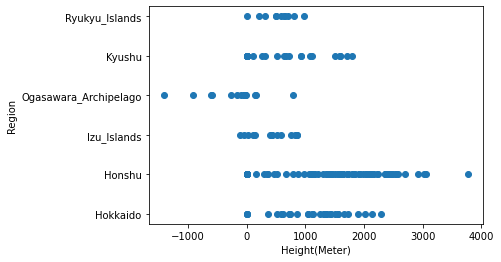

In [20]:
fig, ax = plt.subplots()
plt.scatter(df["Elevation_meters"],df["Region"])
ax.set_xlabel("Height(Meter)")
ax.set_ylabel("Region")

They didnt look so well let's make them bigger

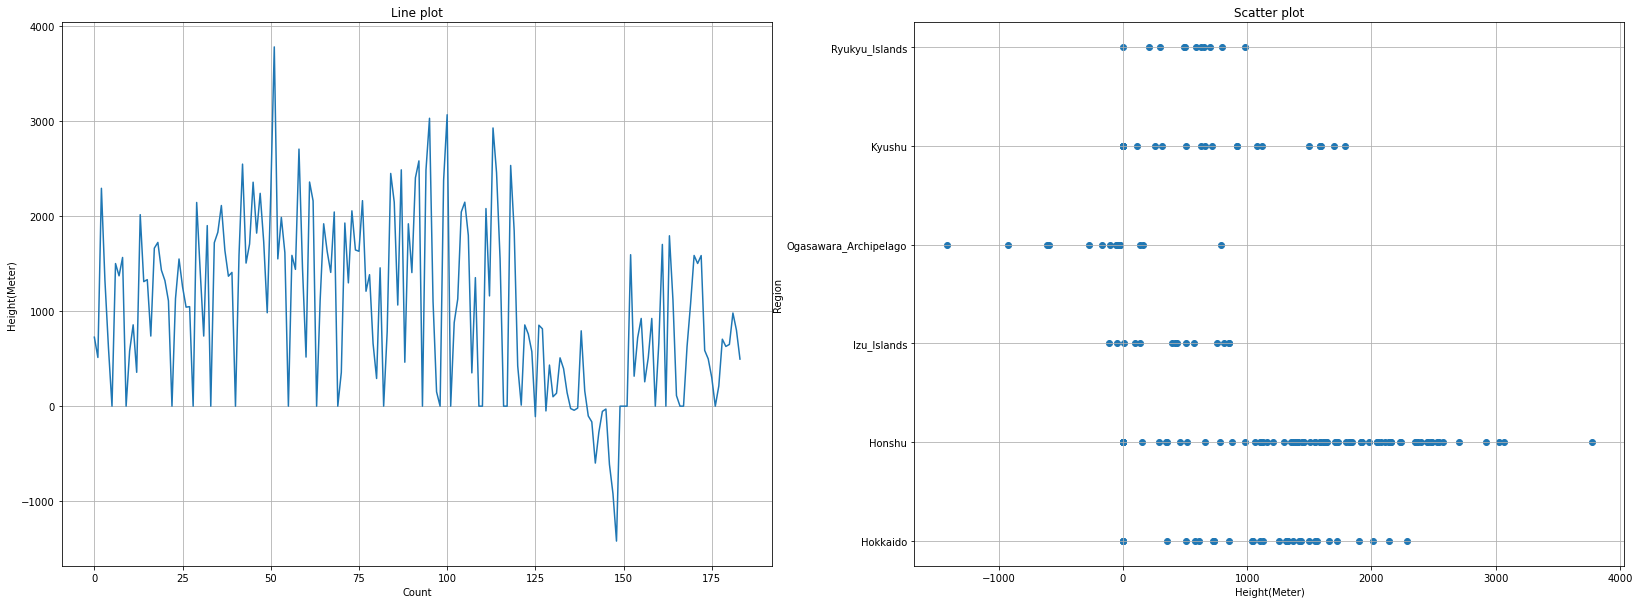

In [21]:
def cm_to_inch(value):
    return value/2.54

fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(28,5)
ax[0].plot(df["Elevation_meters"])
ax[0].grid()

ax[0].set_xlabel("Count")
ax[0].set_ylabel("Height(Meter)")
ax[0].set_title("Line plot")

ax[1].scatter(df["Elevation_meters"],df["Region"])
ax[1].set_xlabel("Height(Meter)")
ax[1].set_ylabel("Region")
ax[1].set_title("Scatter plot")
ax[1].grid()

if you want you may seperate them too.

* **3->Which Letter does their names start mostly?**

In [22]:
#I will use regex and add them on the list 
import re
l=[]


for i in df["Name"]:
    x=re.findall("Mount ([\W+\w+]+)",i)
    y=re.findall("(Mount) [\W+\w+]+",i)
    x="".join(x)#to append all names as a string into list 
    if x!="":
        l.append(x)
    if y==[]:
        i="".join(i)
        l.append(i)   

l

['Akaigawa Caldera',
 'Atosanupuri',
 'Daisetsuzan Volcanic Group',
 'Eniwa',
 'Esan',
 'Akan Caldera\xa0[ja]',
 'Meakan',
 'Oakan',
 'Iō',
 'Kussharo Caldera',
 'Kuttara Caldera',
 'Mashū Caldera',
 'Nigorigawa Caldera',
 'Nipesotsu-Maruyama Volcanic Group',
 'Niseko Volcanic Group',
 'Onnebetsu',
 'Oshima-Ōshima',
 'Rausu',
 'Rishiri',
 'Shikaribetsu Volcano Group',
 'Shikotsu Caldera',
 'Shiribetsu',
 'Tōya Caldera',
 'Hokkaidō-Komagatake',
 'Shari',
 'Shiretoko',
 'Tarumae',
 'Tenchō\xa0[ja]',
 'Tokachi-Mitsumata Caldera',
 'Tomuraushi-Chubetsu Volcano Group',
 'Unabetsu',
 'Usu',
 'Yōtei',
 'Abu Volcano Group',
 'Adatara',
 'Akagi',
 'Akandana',
 'Akita-Komagatake',
 'Akita-Yakeyama',
 'Amagi',
 'Aonoyama Volcano Group\xa0[ja]',
 'Asakusa\xa0[ja]',
 'Asama',
 'Ashitaka',
 'Azuma',
 'Azumaya',
 'Bandai',
 'Chōkai',
 'Daisen',
 'Daruma\xa0[ja]',
 'Eboshi Volcano Group',
 'Fuji',
 'Futamata (ja)',
 'Gassan',
 'Hachimantai',
 'Hakkōda Caldera',
 'Hakkōda',
 'Hakone',
 'Haku',
 'Haruna

In [23]:
#I will use another for loop to take their first letter than I need make an DataFrame to make a bar graph 
l2=[]
for i in range(0,len(l)):
    l2.append(l[i][0])
n_df= pd.DataFrame (l2, columns = ['FirstNamesofLetters'])
n_df

,FirstNamesofLetters
0,A
1,A
2,D
3,E
4,E
...,...
179,K
180,K
181,N
182,S


<AxesSubplot:xlabel='FirstNamesofLetters', ylabel='count'>

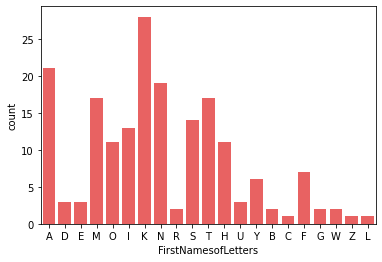

In [24]:
sns.countplot(data = n_df, x = 'FirstNamesofLetters', color = 'red', alpha = 0.7)

"K"is the most used first letter.Of course We removed first "Mount"  word which contains them.Otherwise probably "M" would be most used first letter